## Title :
Exercise: Simple Lasso and Ridge Regularization

## Description :
The aim of this exercise is to understand **Lasso and Ridge regularization.**

For this we will plot the predictor vs coefficient as a horizontal bar chart. The graph will look similar to the one given below.

<img src="img/simple_lasso_ridge.png" style="width: 500px;">

## Data Description:

## Instructions:

- Read the dataset and assign the predictor and response variables.
- Split the dataset into train and validation sets.
- Fit a multi-linear regression model.
- Compute the validation MSE of the model.
- Compute the coefficient of the predictors and store to the plot later.
- Implement Lasso regularization by specifying an alpha value. Repeat steps 4 and 5.
- Implement Ridge regularization by specifying the same alpha value. Repeat steps 4 and 5.
- Plot the coefficient of all the 3 models in one graph as shown above.

## Hints: 

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html" target="_blank">sklearn.normalize()</a>
Scales input vectors individually to the unit norm (vector length)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">sklearn.train_test_split()</a>
Splits the data into random train and test subsets

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">sklearn.LinearRegression()</a>
LinearRegression fits a linear model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit" target="_blank">sklearn.fit()</a>
Fits the linear model to the training data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict" target="_blank">sklearn.predict()</a>
Predict using the linear modReturns the coefficient of the predictors in the model.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html" target="_blank">mean_squared_error()</a>
Mean squared error regression loss

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html" target="_blank">sklearn.Lasso()</a>
Linear Model trained with L1 prior as a regularizer

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html" target="_blank">sklearn.Ridge()</a>
Linear least squares with L2 regularization

**Note:** This exercise is auto-graded and you can try multiple attempts. 

In [39]:
# Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


### Reading the dataset

In [40]:
# Read the file "Boston_housing.csv" as a Pandas dataframe
df = pd.read_csv("data/boston_housing.csv")


## Predictors & Response variables

Select the following columns as predictors
- crim
- indus
- nox
- rm
- age
- dis
- rad
- tax
- ptratio
- black
- lstat

#### Select the 'medv' column as response variable

In [41]:
# Select a subdataframe of predictors mentioned above
X = df[['crim', 'indus', 'nox', 'rm','age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']]

# Normalize the values of the dataframe
X_norm = preprocessing.normalize(X)

# Select medv as the response variable
y = df['medv']


### Split the dataset into train and validation sets


In [42]:
### edTest(test_random) ###
# Split the data into train and validation sets with 70% train data and
# random_state as 31
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.7, random_state=31)


### Multi-linear Regression Analysis

In [43]:
# Initialize a Linear Regression model
lreg = LinearRegression()

# Fit the linear model on the train data
lreg.fit(X_train, y_train)

# Predict on the validation data
y_val_pred = lreg.predict(X_val)


In [44]:
# Use the mean_squared_error function to compute the validation mse
mse = mean_squared_error(y_val,y_val_pred)

# Print the MSE value
print ("Multi-linear regression validation MSE is", mse)


Multi-linear regression validation MSE is 22.628072096368168


### Obtaining the coefficients of the predictors

In [45]:
# Helper code to create a dictionary of the coefficients
# along with the predictors as keys
lreg_coef = dict(zip(X.columns, np.transpose(lreg.coef_)))

# Linear regression coefficients for plotting
lreg_x = list(lreg_coef.keys())
lreg_y = list(lreg_coef.values())


### Implementing Lasso regularization

In [46]:
# Create a Lasso Regression model with alpha as 0.008
lasso_reg = Lasso(alpha=1000)

# Fit the model on the train data
lasso_reg.fit(X_train, y_train)

# Predict on the validation data using the trained model
y_val_pred =lasso_reg.predict(X_val)


### Computing the MSE with Lasso regularization

In [47]:
# Calculate the validation MSE
mse_lasso = mean_squared_error(y_val,y_val_pred)

# Print the validation MSE
print ("Lasso validation MSE is", mse_lasso)


Lasso validation MSE is 81.6687169391508


In [48]:
# Hhelper code to make a dictionary of the predictors
# along with the coefficients associated with them
lasso_coef = dict(zip(X.columns, np.transpose(lasso_reg.coef_)))

# Get the Lasso regularisation coefficients for plotting
lasso_x = list(lasso_coef.keys())
lasso_y = list(lasso_coef.values())


### Implementing Ridge regularization

In [49]:
# Create a Ridge Regression model with alpha as 0.008
ridgeReg = Ridge(alpha=1000)

# Fit the model on the train data
ridgeReg.fit(X_train, y_train)

# Predict the trained model on the validation data
y_val_pred = ridgeReg.predict(X_val)


### Computing the MSE with Ridge regularization

In [50]:
### edTest(test_mse) ###

# Calculate the validation MSE
mse_ridge = mean_squared_error(y_val, y_val_pred)

# Print he valdiation MSE
print ("Ridge validation MSE is", mse_ridge)


Ridge validation MSE is 28.677154259849278


### Obtaining the coefficients of the predictors

In [51]:
# Helper code to make a dictionary of the predictors 
# along with the coefficients associated with them 
ridge_coef = dict(zip(X.columns, np.transpose(ridgeReg.coef_))) 

# Ridge regularisation coefficients for plotting
ridge_x = list(ridge_coef.keys())
ridge_y = list(ridge_coef.values())


### Plotting the graph

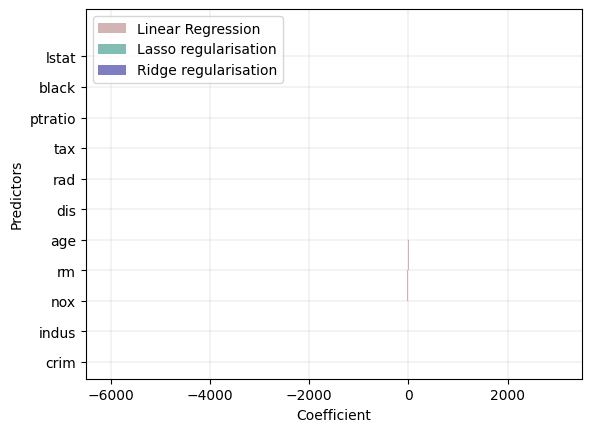

In [52]:
# Helper code below to visualise your results

plt.rcdefaults()

plt.barh(lreg_x,lreg_y,1.0, align='edge',color="#D3B4B4", label="Linear Regression")
plt.barh(lasso_x,lasso_y,0.75 ,align='edge',color="#81BDB2",label = "Lasso regularisation")
plt.barh(ridge_x,ridge_y,0.25 ,align='edge',color="#7E7EC0", label="Ridge regularisation")
plt.grid(linewidth=0.2)
plt.xlabel("Coefficient")
plt.ylabel("Predictors")
plt.legend(loc='best')
plt.xlim(-6500,3500)
plt.show()


#### ⏸ How does the performance of Lasso and Ridge regression compare with that of Linear regression?

**Linear Regression:**

Linear regression is the basic form of regression without any regularization.
It minimizes the sum of squared differences between the observed and predicted values.
It can be sensitive to outliers and may overfit if the number of predictors is large.

**Lasso Regression:**

Lasso regression introduces L1 regularization, which adds a penalty term based on the absolute values of the coefficients.
It is useful for feature selection because it tends to shrink some coefficients to exactly zero, effectively eliminating certain predictors.
Lasso performs well when there are a large number of features, and some of them are irrelevant or redundant.

**Ridge Regression:**

Ridge regression introduces L2 regularization, which adds a penalty term based on the squared values of the coefficients.
It helps prevent multicollinearity (high correlation between predictors) and stabilizes the model by limiting the magnitude of the coefficients.
Ridge is effective when there are many predictors with high collinearity.

**Performance Comparison:**

- Linear regression may perform well when there are few predictors and no issues with multicollinearity or overfitting.
- Lasso and Ridge are beneficial when dealing with multicollinearity and preventing overfitting in the presence of many predictors.
- The choice between Lasso and Ridge depends on the specific characteristics of the dataset. Lasso is preferable when you suspect that many predictors are irrelevant, while Ridge is suitable when collinearity is a concern.

In summary, the performance of Lasso and Ridge regression is often better than simple Linear regression when dealing with complex datasets with many predictors, and the choice between Lasso and Ridge depends on the specific characteristics of the data and the goals of the modeling task.

#### ⏸ Change the alpha values for both, Lasso and Ridge, to 1000. What happens to the coefficients?


In [38]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below 
answer2 = 'They increase for both Lasso and Ridge, but not for Linear Regression'
